In [3]:
import pandas as pd

In [4]:
#!pip install pandas statsmodels

In [5]:
data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"


data = pd.read_csv(data_location + "energy/SF_hospital_load.csv")
data.head(3)

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338


<Axes: >

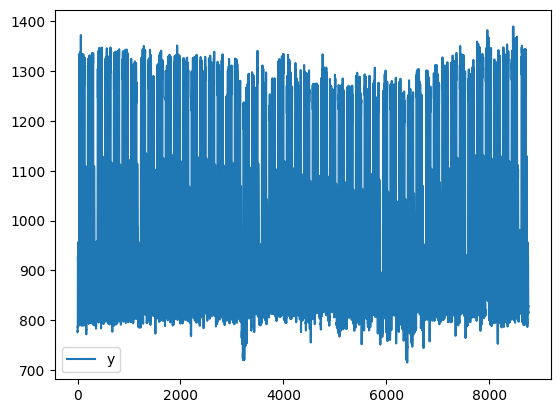

In [6]:
data.plot()

In [7]:
data = data.rename(columns={'ds':'datetime', 'y':'value'})

Theta     
Seasonal Naive    
auto-arima/sarima/sarimax   

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your time series data into a pandas DataFrame
# The data should have a 'datetime' column and a 'value' column
#data = pd.read_csv('your_data.csv')
data['datetime'] = pd.to_datetime(data['datetime'])
data.set_index('datetime', inplace=True)

In [9]:
# Split the data into training and testing sets
train_data = data.iloc[:-24]  # Use all but the last 12 data points for training
test_data = data.iloc[-24:]  # Use the last 12 data points for testing

# Perform theta forecasting using Exponential Smoothing
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=24)
fitted_model = model.fit()

# Forecast the values for the test period
forecast = fitted_model.forecast(steps=len(test_data))

/Users/biranyucel/Downloads/sagemaker-studiolab-notebooks/env/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/biranyucel/Downloads/sagemaker-studiolab-notebooks/env/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


<Axes: xlabel='datetime'>

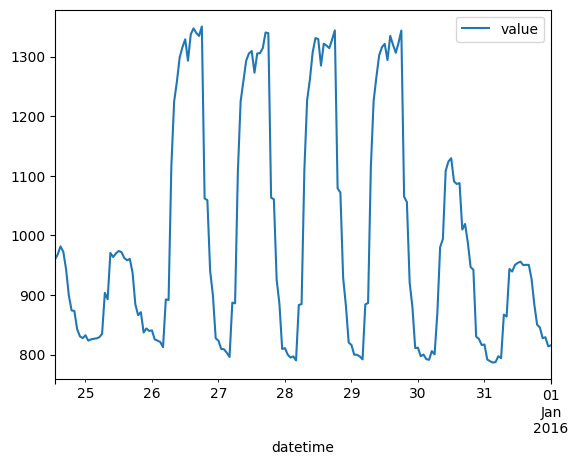

In [10]:
data.iloc[-180:].plot()

In [11]:
def plot_forecast(actual_data, forecast):
    # Plot the actual values and the forecasted values
    plt.plot(actual_data.index, actual_data['value'], label='Actual')
    plt.plot(forecast.index, forecast, label='Forecast')
    plt.xlabel('Date')
    plt.xticks(rotation=45)
    plt.ylabel('Value')
    plt.legend()
    plt.show()

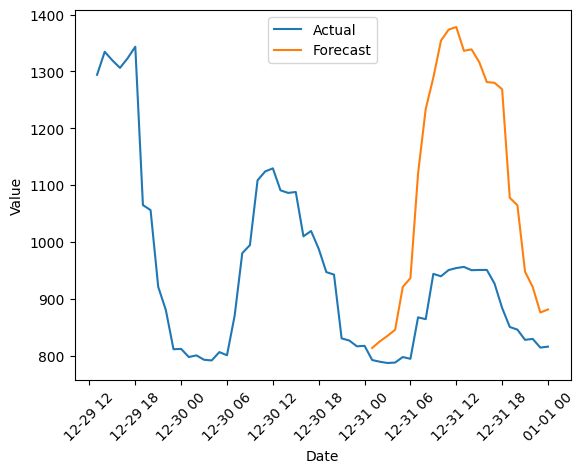

In [12]:
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Value')
plt.legend()
plt.show()

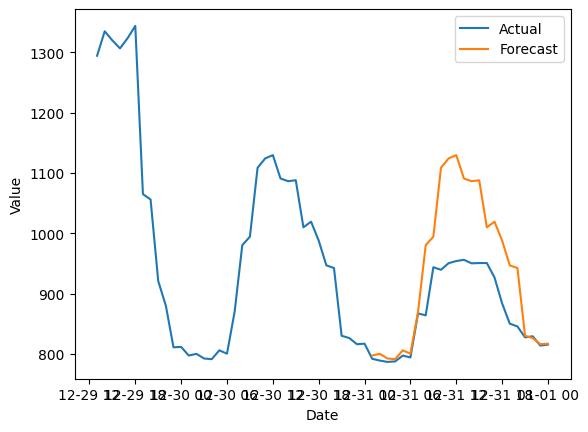

In [111]:
# Define the seasonal period
seasonal_period = 24  # Adjust the period based on your data's seasonality

# Split the data into training and testing sets
train_data = data.iloc[:-seasonal_period]  # Use all but the last seasonal_period data points for training
test_data = data.iloc[-seasonal_period:]  # Use the last seasonal_period data points for testing

# Perform seasonal naive forecasting
forecast_n = pd.DataFrame(index=test_data.index, columns=['value'])
for i in range(len(test_data)):
    forecast_n['value'][i] = train_data['value'][(i % seasonal_period) - seasonal_period]
    
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(forecast_n.index, forecast_n['value'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [104]:
forecast_n

,value
datetime,
2015-12-31 01:00:00,797.344807
2015-12-31 02:00:00,800.197023
2015-12-31 03:00:00,792.465614
2015-12-31 04:00:00,791.340322
2015-12-31 05:00:00,805.993125
2015-12-31 06:00:00,800.443718
2015-12-31 07:00:00,870.051648
2015-12-31 08:00:00,980.187392
2015-12-31 09:00:00,994.328352


In [99]:
def seasonal_naive_forecast(series, seasonal_period, horizon):
    """
    Perform seasonal naive forecasting for a given time series.
    :param series: numpy array or list, representing the time series data
    :param seasonal_period: int, representing the seasonal period of the time series
    :param horizon: int, representing the number of future time steps to forecast
    :return: numpy array, containing the seasonal naive forecasted values
    """
    series = np.array(series)
    forecast = np.empty(horizon)
    num_seasons = len(series) // seasonal_period
    
    for i in range(horizon):
        forecast[i] = series[-seasonal_period + i % seasonal_period]
    
    return forecast

### data

In [14]:
from plotly.offline import iplot

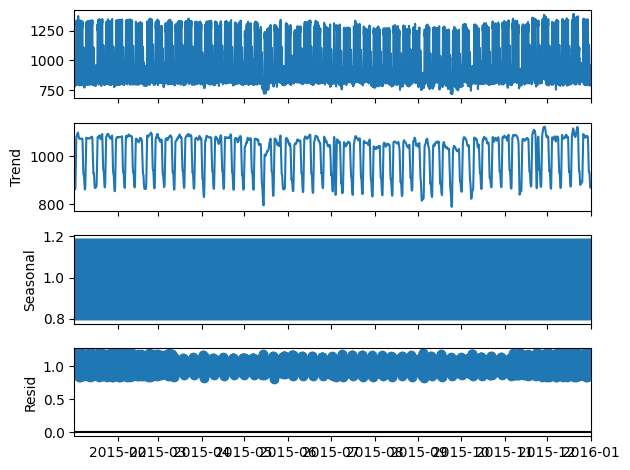

In [15]:
#from chart_studio.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data, model='multiplicative')
fig = result.plot()

In [36]:
print(result.seasonal.period)

AttributeError: 'Series' object has no attribute 'period'

In [17]:
#!pip install pmdarima

In [27]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

ModuleNotFoundError: No module named 'pmdarima'

In [19]:
# ARIMA with Nixtla statsforecast

In [20]:
df = data.reset_index()

In [21]:
df = df.rename(columns={'datetime': 'ds', 'value': 'y'})
df['unique_id'] = 'unique_id'

In [22]:
df

,ds,y,unique_id
0,2015-01-01 01:00:00,778.007969,unique_id
1,2015-01-01 02:00:00,776.241750,unique_id
2,2015-01-01 03:00:00,779.357338,unique_id
3,2015-01-01 04:00:00,778.737196,unique_id
4,2015-01-01 05:00:00,787.835835,unique_id
...,...,...,...
8755,2015-12-31 20:00:00,845.563081,unique_id
8756,2015-12-31 21:00:00,827.530521,unique_id
8757,2015-12-31 22:00:00,829.256300,unique_id
8758,2015-12-31 23:00:00,813.937205,unique_id


In [23]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models = [AutoARIMA(season_length = 24)],
    freq = 'H'
)

# Define the seasonal period
seasonal_period = 24  # Adjust the period based on your data's seasonality

# Split the data into training and testing sets
train_data = df.iloc[:-seasonal_period]  # Use all but the last seasonal_period data points for training
test_data = df.iloc[-seasonal_period:]  # Use the last seasonal_period data points for testing

sf.fit(train_data)
sf.predict(h=24, level=[95])

/Users/biranyucel/Downloads/sagemaker-studiolab-notebooks/env/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
unique_id,,,,
unique_id,2015-12-31 01:00:00,816.566772,735.434082,897.699524
unique_id,2015-12-31 02:00:00,820.092163,718.514160,921.670105
unique_id,2015-12-31 03:00:00,812.795959,690.049744,935.542236
unique_id,2015-12-31 04:00:00,805.702454,669.061279,942.343689
unique_id,2015-12-31 05:00:00,840.196838,695.967529,984.426208
unique_id,2015-12-31 06:00:00,833.369446,685.470642,981.268250
unique_id,2015-12-31 07:00:00,947.978271,798.479553,1097.476929
unique_id,2015-12-31 08:00:00,1058.687256,908.557068,1208.817505
unique_id,2015-12-31 09:00:00,1077.971069,927.616150,1228.326050


In [24]:
predict_sf = sf.predict(h=24, level=[95])

<__array_function__ internals>:200: RuntimeWarning:

invalid value encountered in cast



In [25]:
predict_sf.columns

Index(['ds', 'AutoARIMA', 'AutoARIMA-lo-95', 'AutoARIMA-hi-95'], dtype='object')

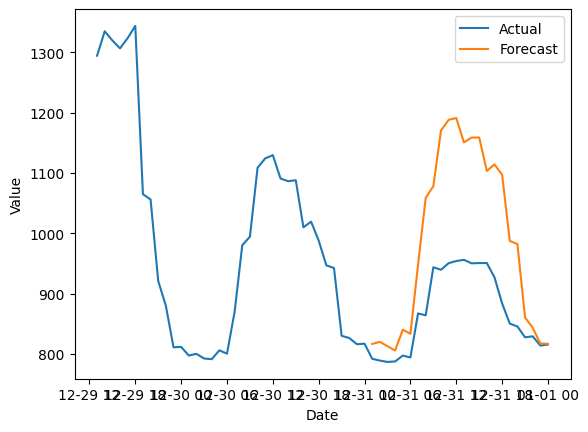

In [26]:
# Plot the actual values and the forecasted values
plt.plot(data.iloc[-60:].index, data['value'].iloc[-60:], label='Actual')
plt.plot(predict_sf.ds, predict_sf['AutoARIMA'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [88]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

def get_seasonal_period(time_series):
    # Calculate the autocorrelation of the time series
    autocorrelation = sm.tsa.acf(time_series, fft=True)
    
    # Plot the autocorrelation
    plt.figure(figsize=(12, 6))
    plt.stem(range(len(autocorrelation)), autocorrelation)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Plot')
    plt.show()
    
    # Find the index of the highest peak after the first peak
    seasonal_period = 0
    highest_peak = 0
    for i in range(1, len(autocorrelation) - 1):
        if autocorrelation[i] > autocorrelation[i-1] and autocorrelation[i] > autocorrelation[i+1] and autocorrelation[i] > highest_peak:
            highest_peak = autocorrelation[i]
            seasonal_period = i
    
    return seasonal_period


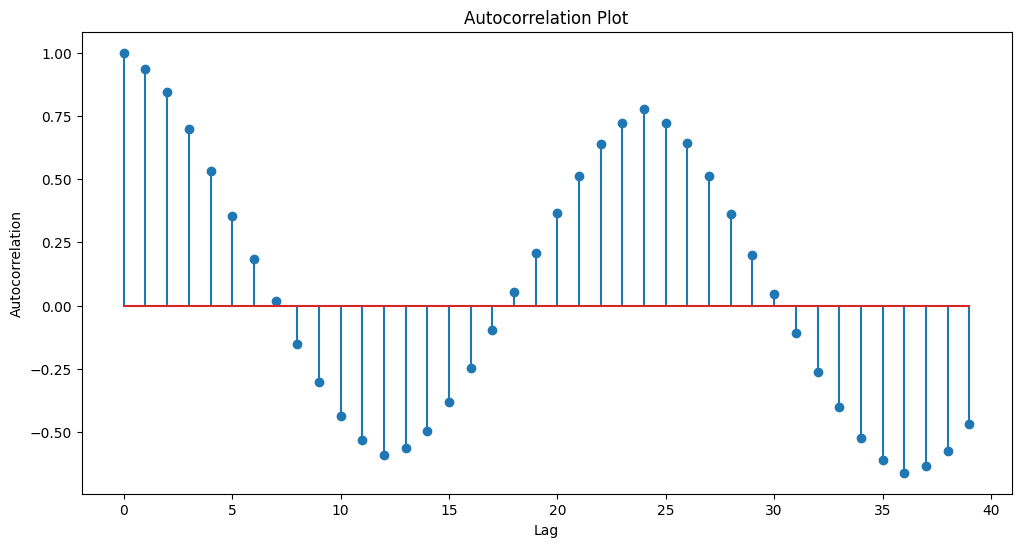

24


In [89]:
s = get_seasonal_period(data)
print(s)

In [71]:
import pandas as pd
import statsmodels.api as sm

def check_seasonality(time_series):

    # Decompose the time series
    decomposition = sm.tsa.seasonal_decompose(time_series)
    
    # Retrieve the seasonal component
    seasonality = decomposition.seasonal
    
    # Check if there is seasonality
    if seasonality is not None:
        return "Seasonal"
    else:
        return "Non-Seasonal"


In [67]:
data.reset_index().rename(columns={'datetime': 'index'}).set_index('index')

,value
index,
2015-01-01 01:00:00,778.007969
2015-01-01 02:00:00,776.241750
2015-01-01 03:00:00,779.357338
2015-01-01 04:00:00,778.737196
2015-01-01 05:00:00,787.835835
...,...
2015-12-31 20:00:00,845.563081
2015-12-31 21:00:00,827.530521
2015-12-31 22:00:00,829.256300


In [74]:
data

,value
datetime,
2015-01-01 01:00:00,778.007969
2015-01-01 02:00:00,776.241750
2015-01-01 03:00:00,779.357338
2015-01-01 04:00:00,778.737196
2015-01-01 05:00:00,787.835835
...,...
2015-12-31 20:00:00,845.563081
2015-12-31 21:00:00,827.530521
2015-12-31 22:00:00,829.256300


In [75]:
stationarity = check_seasonality(data, 'H')
print(stationarity)

Seasonal


In [82]:
def get_frequency(time_series):
    # Check if the index of the time series is a DateTimeIndex
    if isinstance(time_series.index, pd.DatetimeIndex):
        # Infer the frequency of the time series
        frequency = pd.infer_freq(time_series.index)
        
        if frequency is None:
            return "Frequency not found"
        else:
            return frequency
    else:
        return "DateTimeIndex not found"

In [84]:
get_frequency(data.reset_index())

'DateTimeIndex not found'

In [90]:
import numpy as np

def calculate_smape(y_true, y_pred):
    """
    Calculate the SMAPE (Symmetric Mean Absolute Percentage Error) between two arrays.
    :param y_true: numpy array or list, representing the true values
    :param y_pred: numpy array or list, representing the predicted values
    :return: float, SMAPE value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    numerator = np.abs(y_pred - y_true)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    
    smape = np.mean(numerator / denominator) * 100.0
    
    return smape


In [95]:
def calculate_mape(y_true, y_pred):
    """
    Calculate the MAPE (Mean Absolute Percentage Error) between two arrays.
    :param y_true: numpy array or list, representing the true values
    :param y_pred: numpy array or list, representing the predicted values
    :return: float, MAPE value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    percentage_errors = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(percentage_errors) * 100.0
    
    return mape

In [96]:
def calculate_mase(y_true, y_pred, y_train):
    """
    Calculate the MASE (Mean Absolute Scaled Error) between the true values and predicted values.
    :param y_true: numpy array or list, representing the true values
    :param y_pred: numpy array or list, representing the predicted values
    :param y_train: numpy array or list, representing the historical training values
    :return: float, MASE value
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_train = np.array(y_train)
    
    training_error = np.mean(np.abs(y_train[1:] - y_train[:-1]))
    forecast_error = np.mean(np.abs(y_true - y_pred))
    
    mase = forecast_error / training_error
    
    return mase

In [93]:
test_data

,value
datetime,
2015-12-31 01:00:00,791.973849
2015-12-31 02:00:00,789.026179
2015-12-31 03:00:00,786.791665
2015-12-31 04:00:00,787.582787
2015-12-31 05:00:00,797.304779
2015-12-31 06:00:00,794.181446
2015-12-31 07:00:00,867.148737
2015-12-31 08:00:00,863.977406
2015-12-31 09:00:00,943.689050


In [92]:
forecast

,value
datetime,
2015-12-31 01:00:00,797.344807
2015-12-31 02:00:00,800.197023
2015-12-31 03:00:00,792.465614
2015-12-31 04:00:00,791.340322
2015-12-31 05:00:00,805.993125
2015-12-31 06:00:00,800.443718
2015-12-31 07:00:00,870.051648
2015-12-31 08:00:00,980.187392
2015-12-31 09:00:00,994.328352


In [94]:
calculate_smape(test_data, forecast)

6.78090173023706

In [97]:
calculate_mape(test_data, forecast)

7.238410286071397

In [98]:
calculate_mase(test_data, forecast, train_data)

1.685560278654149

In [100]:
def seasonal_naive_forecast(series, seasonal_period, horizon):
    """
    Perform seasonal naive forecasting for a given time series.
    :param series: numpy array or list, representing the time series data
    :param seasonal_period: int, representing the seasonal period of the time series
    :param horizon: int, representing the number of future time steps to forecast
    :return: numpy array, containing the seasonal naive forecasted values
    """
    series = np.array(series)
    forecast = np.empty(horizon)
    num_seasons = len(series) // seasonal_period
    
    for i in range(horizon):
        forecast[i] = series[-seasonal_period + i % seasonal_period]
    
    return forecast


In [101]:
# Example time series and forecasting parameters
time_series = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]
seasonal_period = 4
forecast_horizon = 3

# Perform seasonal naive forecasting
forecast = seasonal_naive_forecast(time_series, seasonal_period, forecast_horizon)

# Print the forecasted values
print("Forecast:", forecast)


Forecast: [50. 55. 60.]


In [102]:
seasonal_naive_forecast(train_data, 24, 24)

array([ 797.3448067,  800.1970234,  792.465614 ,  791.3403216,
        805.9931251,  800.443718 ,  870.051648 ,  980.1873918,
        994.328352 , 1108.434719 , 1124.041185 , 1129.444609 ,
       1090.775945 , 1086.221589 , 1087.829986 , 1009.817805 ,
       1019.18002  ,  987.7957646,  946.7885187,  942.4191353,
        830.1274514,  826.3457555,  816.1606232,  817.016735 ])

In [105]:
forecast_n

,value
datetime,
2015-12-31 01:00:00,797.344807
2015-12-31 02:00:00,800.197023
2015-12-31 03:00:00,792.465614
2015-12-31 04:00:00,791.340322
2015-12-31 05:00:00,805.993125
2015-12-31 06:00:00,800.443718
2015-12-31 07:00:00,870.051648
2015-12-31 08:00:00,980.187392
2015-12-31 09:00:00,994.328352


In [106]:
calculate_smape(test_data, forecast_n)

6.78090173023706

In [108]:
test_data

,value
datetime,
2015-12-31 01:00:00,791.973849
2015-12-31 02:00:00,789.026179
2015-12-31 03:00:00,786.791665
2015-12-31 04:00:00,787.582787
2015-12-31 05:00:00,797.304779
2015-12-31 06:00:00,794.181446
2015-12-31 07:00:00,867.148737
2015-12-31 08:00:00,863.977406
2015-12-31 09:00:00,943.689050


datetime index     
value y     

unique_id     
ds     
y     

In [123]:
data_id = data.copy()

In [124]:
data_id['unique_id'] = np.nan

In [135]:
data_id = data_id.reset_index().rename(columns={'datetime': 'ds', 'value':'y'})

In [131]:
data.index.dtype

dtype('<M8[ns]')

In [134]:
data_id.dtypes

value        float64
unique_id    float64
dtype: object

In [1]:
from statsforecast.models import (
    Theta,
    AutoARIMA,
    SeasonalNaive
)

/Users/biranyucel/Downloads/sagemaker-studiolab-notebooks/env/lib/python3.10/site-packages/statsforecast/core.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [ ]:
model = Theta(season_length=24)
model = model.fit(y=data_id.y.to_numpy())
y_hat_dict = model.predict(h=24)

In [ ]:
y_hat_dict